In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

scene_path = './data/input1.jpg'
mask_path = './data/input1_mask.jpg'
compl_path = './data/result_img007.jpg'

(600, 800)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


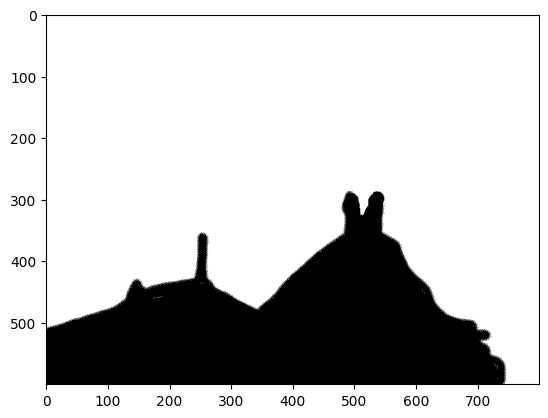

In [22]:
mask_im = np.asarray(Image.open(mask_path).convert('1'))
plt.imshow(mask_im, cmap='gray')
print(mask_im.shape)
print(mask_im[:5, :5])

In [45]:
from main import vicinity_via_bfs

vicinity_via_bfs(Image.open(mask_path), 80)

test


In [15]:
tmp = (mask_im == [[[255, 255, 255]]])
tmp.shape

(600, 800, 3)

In [32]:
xs, ys = np.where(np.array([[True, False, True], [True, False, False]]) == True)
q = np.concatenate((xs.reshape(-1, 1), ys.reshape(-1, 1)), axis=1).tolist()
print(q)
print(type(q))

[[0, 0], [0, 2], [1, 0]]
<class 'list'>


In [35]:
q.pop()

[1, 0]

In [36]:
q

[[0, 2]]

In [37]:
list(zip([0, 1, 2], [2, 1, 0]))

[(0, 2), (1, 1), (2, 0)]

In [43]:
np.where(np.array([True, False, True]) == False)

(array([1]),)

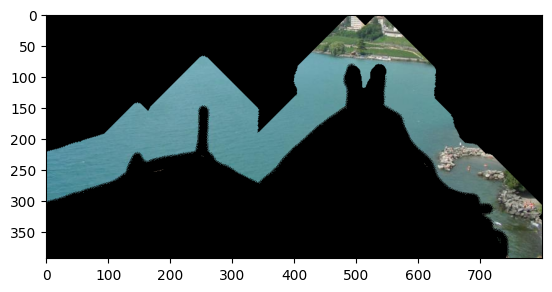

In [79]:
import main
import importlib
importlib.reload(main)

vici_np = main.vicinity_via_bfs(Image.open(mask_path), 80)
crop_np = main.crop(Image.open(scene_path), vici_np)
plt.imshow(crop_np)

Resampling.NEAREST


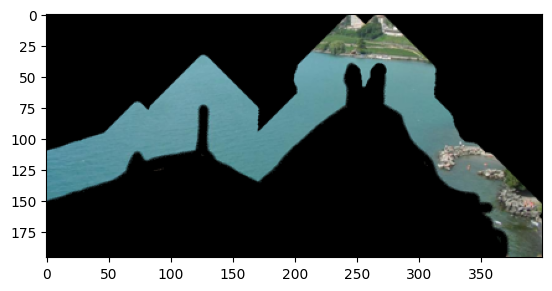

In [114]:
import PIL
print(Image.Resampling.NEAREST)
plt.imshow(Image.fromarray(np.uint8(crop_np)).resize((int(crop_np.shape[1] / 2), int(crop_np.shape[0] / 2))))

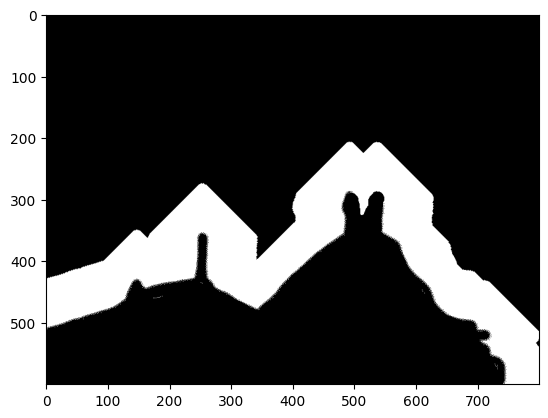

In [113]:
import matplotlib.pyplot as plt

plt.imshow(vici, cmap='gray')

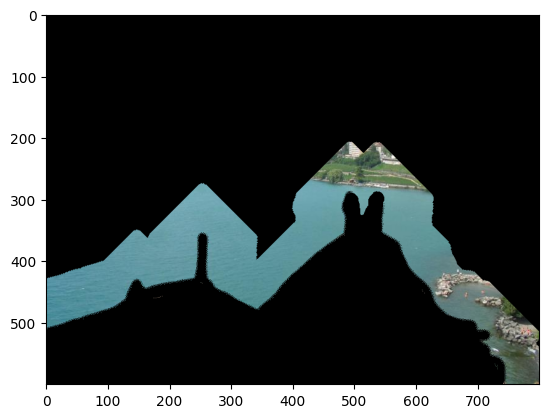

In [77]:
vici_np = np.expand_dims(vici, axis=2)
scene_np = np.asarray(Image.open(scene_path))
crop_np = vici_np * scene_np
plt.imshow(crop_np)